In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
with open("hk_n_clust_per_module.txt") as file:
    hk_lines = file.readlines()
    
with open("spccl_n_clust_per_module.txt") as file:
    spccl_lines = file.readlines()

In [4]:
hk_lines

['Running build/bin/traccc_seq_example_cuda tml_detector/trackml-detector.csv tml_pixels/ 1\n',
 'Starting CUDA clusterization.\n',
 'Number of modules: 3859\n',
 'TIME TAKEN FOR HK CLUSTERISATION: 0.311944s\n',
 'TIME TAKEN FOR LABEL NORMALISATION: 0.172872s\n',
 'After: 9 clusters in module 3840.\n',
 'After: 7 clusters in module 3841.\n',
 'After: 12 clusters in module 3842.\n',
 'After: 12 clusters in module 3843.\n',
 'After: 10 clusters in module 3844.\n',
 'After: 7 clusters in module 3845.\n',
 'After: 7 clusters in module 3846.\n',
 'After: 6 clusters in module 3847.\n',
 'After: 12 clusters in module 3848.\n',
 'After: 10 clusters in module 3849.\n',
 'After: 12 clusters in module 3850.\n',
 'After: 8 clusters in module 3851.\n',
 'After: 7 clusters in module 3852.\n',
 'After: 9 clusters in module 3853.\n',
 'After: 9 clusters in module 3854.\n',
 'After: 11 clusters in module 3855.\n',
 'After: 6 clusters in module 3856.\n',
 'After: 6 clusters in module 3857.\n',
 'After: 

In [10]:
hk_n_clusters = {}
spccl_n_clusters = {}
for line in hk_lines:
    if ("clusters" in line):
        n_clusters_end = line.find("clusters") - 1
        n_clusters = int(line[7:n_clusters_end])
        
        module_start = line.find("module") + 7
        module_num = int(line[module_start:-2])
        
        hk_n_clusters[module_num] = n_clusters
        
for line in spccl_lines:
    if ("clusters" in line):
        n_clusters_end = line.find("clusters") - 1
        n_clusters = int(line[7:n_clusters_end])
        
        module_start = line.find("module") + 7
        module_num = int(line[module_start:-2])
        
        spccl_n_clusters[module_num] = n_clusters

In [15]:
n_modules = len(list(hk_n_clusters.keys()))
print(n_modules == len(list(spccl_n_clusters.keys())))

True


In [20]:
n_mismatches = 0

for module in range(n_modules):
    num_clusters_hk = hk_n_clusters[module]
    num_clusters_spccl = spccl_n_clusters[module]
    
    if (num_clusters_hk != num_clusters_spccl):
        n_mismatches += 1
        print(f"Cluster mismatch found in module {module}.")
        print(f"HK: {num_clusters_hk} clusters found. Sparse CCL: {num_clusters_spccl} clusters found\n")

Cluster mismatch found in module 541.
HK: 31 clusters found. Sparse CCL: 30 clusters found

Cluster mismatch found in module 742.
HK: 27 clusters found. Sparse CCL: 18 clusters found

Cluster mismatch found in module 743.
HK: 26 clusters found. Sparse CCL: 19 clusters found

Cluster mismatch found in module 744.
HK: 28 clusters found. Sparse CCL: 20 clusters found

Cluster mismatch found in module 745.
HK: 20 clusters found. Sparse CCL: 16 clusters found

Cluster mismatch found in module 746.
HK: 21 clusters found. Sparse CCL: 14 clusters found

Cluster mismatch found in module 747.
HK: 13 clusters found. Sparse CCL: 9 clusters found

Cluster mismatch found in module 748.
HK: 9 clusters found. Sparse CCL: 7 clusters found

Cluster mismatch found in module 749.
HK: 33 clusters found. Sparse CCL: 20 clusters found

Cluster mismatch found in module 750.
HK: 22 clusters found. Sparse CCL: 16 clusters found

Cluster mismatch found in module 751.
HK: 24 clusters found. Sparse CCL: 16 cluster

In [21]:
print(n_mismatches)

557


In [25]:
hk_num_clusters_np = np.zeros(n_modules, dtype=np.int32)
spccl_num_clusters_np = np.zeros(n_modules, dtype=np.int32)
for module in range(n_modules):
    hk_num_clusters_np[module] = hk_n_clusters[module]
    spccl_num_clusters_np[module] = spccl_n_clusters[module]

In [28]:
num_cluster_diffs = hk_num_clusters_np - spccl_num_clusters_np

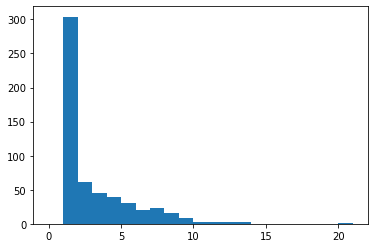

In [39]:
bin_edges = np.arange(22)
_, bins, _ = plt.hist(num_cluster_diffs[np.where(num_cluster_diffs)[0]], bins = bin_edges)
#plt.yscale("log")
plt.show()

In [38]:
bins

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

$\textbf{To bring up tomorrow}$: Matching rate is the rate between the CPU and GPU, not between the "real" values/measurements and the evaluated ones from GPU and/or CPU.

In [14]:
thread_numbers = [64, 128, 256, 512, 1024]
time_taken_with_lookup = []
time_taken_without_lookup = []

msmnt_matching_rate_lookup = []
msmnt_matching_rate_no_lookup = []

track_parameter_matching_rate_lookup = []
track_parameter_matching_rate_no_lookup = []


for thread_number in thread_numbers:
    with open("threadsPerBlock_" + str(thread_number) + ".txt") as file:
        thread_lines = file.readlines()
        
    with open("less_lookup_" + str(thread_number) + "threads.txt") as file:
        less_lookup_lines = file.readlines()
        
    for line in thread_lines:
        
        if "measurements matching rate" in line:
            rate_begins = line.find(":") + 2
            msmnt_matching_rate_lookup.append(float(line[rate_begins:-1]))
            
        elif "track parameters matching rate" in line:
            rate_begins = line.find(":") + 2
            track_parameter_matching_rate_lookup.append(float(line[rate_begins:-1]))
        
        elif "clusterization and sp formation (cuda)" in line:
            time_taken_begins = line.find(")") + 2
            time_taken_with_lookup.append(float(line[time_taken_begins:-1]))
            break
            
    for line in less_lookup_lines:
        
        if "measurements matching rate" in line:
            rate_begins = line.find(":") + 2
            msmnt_matching_rate_no_lookup.append(float(line[rate_begins:-1]))
            
        elif "track parameters matching rate" in line:
            rate_begins = line.find(":") + 2
            track_parameter_matching_rate_no_lookup.append(float(line[rate_begins:-1]))
        
        elif "clusterization and sp formation (cuda)" in line:
            time_taken_begins = line.find(")") + 2
            time_taken_without_lookup.append(float(line[time_taken_begins:-1]))
            break

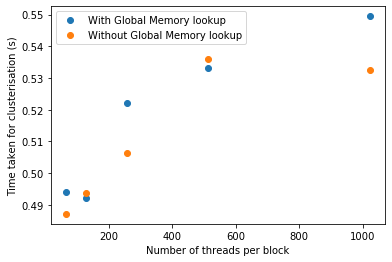

In [15]:
plt.plot(thread_numbers, time_taken_with_lookup, "o", label="With Global Memory lookup")
plt.plot(thread_numbers, time_taken_without_lookup, "o", label="Without Global Memory lookup")
plt.xlabel("Number of threads per block")
plt.ylabel("Time taken for clusterisation (s)")
plt.legend()
plt.show()

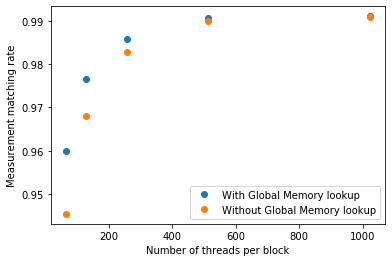

In [16]:
plt.plot(thread_numbers, msmnt_matching_rate_lookup, "o", label="With Global Memory lookup")
plt.plot(thread_numbers, msmnt_matching_rate_no_lookup, "o", label="Without Global Memory lookup")
plt.xlabel("Number of threads per block")
plt.ylabel("Measurement matching rate")
plt.legend()
plt.show()

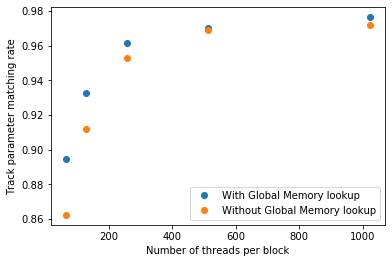

In [17]:
plt.plot(thread_numbers, track_parameter_matching_rate_lookup, "o", label="With Global Memory lookup")
plt.plot(thread_numbers, track_parameter_matching_rate_no_lookup, "o", label="Without Global Memory lookup")
plt.xlabel("Number of threads per block")
plt.ylabel("Track parameter matching rate")
plt.legend()
plt.show()

Meeting on 24/02:
$\begin{itemize}
    \item Per thread timing (for individual modules, maybe pick some low and high occupancy modules)
    \item Per module accuracy (are bigger ones worse necessarily?)
    \item Check "distance" (\chi^2 thingy) between cpu and gpu for different something (like threads per block)
    \item Reduce global lookup with cell and label structures, i.e. put the current cell position and label in shared memory
\end{itemise}$

In [3]:
times_256_nowhile = np.array([0.2815, 0.2846, 0.2796, 0.2705, 0.2735])
times_256_while = np.array([0.2813, 0.2758, 0.2866, 0.2737, 0.2759])

In [6]:
mean_nowhile = np.mean(times_256_nowhile)
mean_while = np.mean(times_256_while)
print(mean_while - mean_nowhile)

0.0007199999999999984


In [11]:
spccl_times = np.zeros(10)
for i in range(10):
    path = "spccl/" + str(i+1) + ".txt"
    with open(path) as file:
        lines = file.readlines()
    
    spccl_times[i] = float(lines[3][35:-2])
    
spccl_mean = np.mean(spccl_times)
spccl_std = np.std(spccl_times)

In [13]:
thread_nos = np.arange(1, 17, dtype=np.int32) * 64
hk_find_times = np.zeros((16,10))
hk_iterate_times = np.zeros((16,10))

hk_find_track_accuracy = np.zeros((16,10))
hk_iterate_track_accuracy = np.zeros((16,10))

In [14]:
for i in range(10):
    for j, thread_no in enumerate(thread_nos):
        path = "find/" + str(thread_no) + "/" + str(i+1) + ".txt"
        with open(path) as file:
            lines = file.readlines()

        hk_find_times[j,i] = float(lines[3][34:-2])
        hk_find_track_accuracy[j, i] = float(lines[11][33:-1])

for i in range(10):
    for j, thread_no in enumerate(thread_nos):
        path = "iterate/" + str(thread_no) + "/" + str(i+1) + ".txt"
        with open(path) as file:
            lines = file.readlines()

        hk_iterate_times[j,i] = float(lines[3][34:-2])
        hk_iterate_track_accuracy[j, i] = float(lines[11][33:-1])

In [15]:
hk_find_means = np.mean(hk_find_times, axis=1)
hk_find_std = np.std(hk_find_times, axis=1)
hk_find_err = hk_find_std / np.sqrt(10)

hk_iterate_means = np.mean(hk_iterate_times, axis=1)
hk_iterate_std = np.std(hk_iterate_times, axis=1)
hk_iterate_err = hk_iterate_std / np.sqrt(10)

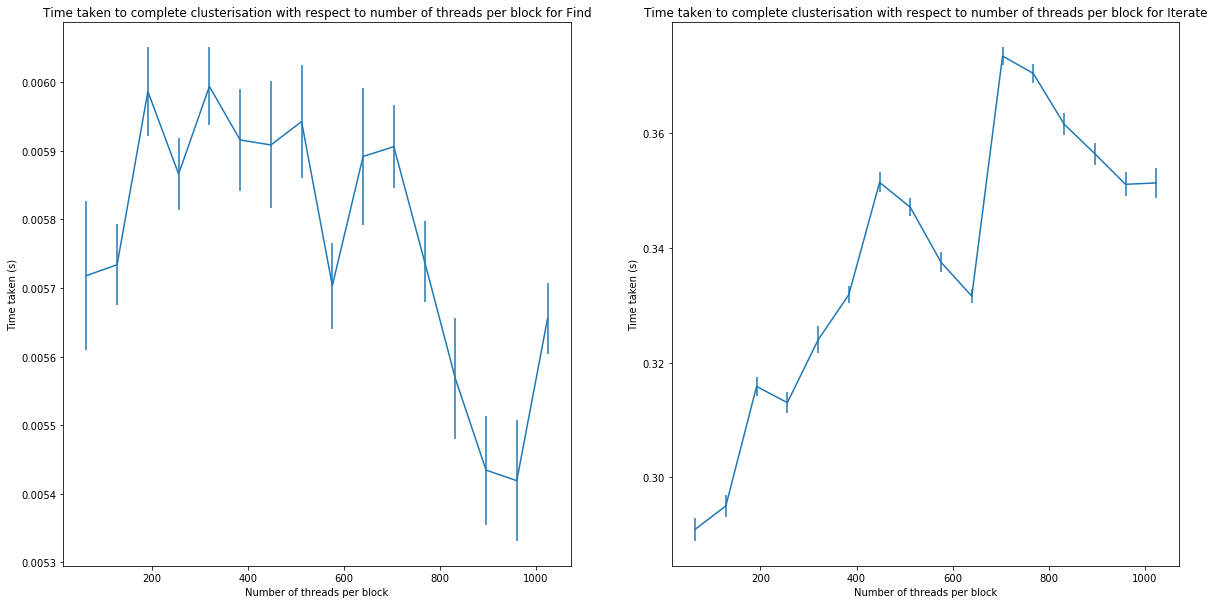

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.errorbar(thread_nos, hk_find_means, yerr=hk_find_err, label="Find")
ax1.set_title("Time taken to complete clusterisation with respect to number of threads per block for Find")
ax1.set_ylabel("Time taken (s)")
ax1.set_xlabel("Number of threads per block")
ax2.errorbar(thread_nos, hk_iterate_means, yerr=hk_iterate_err, label="Iterate")
ax2.set_title("Time taken to complete clusterisation with respect to number of threads per block for Iterate")
ax2.set_ylabel("Time taken (s)")
ax2.set_xlabel("Number of threads per block")
plt.savefig("clusterisation_times.pdf")
plt.show()

In [18]:
hk_find_track_acc_means = np.mean(hk_find_track_accuracy, axis=1)
hk_find_track_acc_std = np.std(hk_find_track_accuracy, axis=1)
hk_find_track_acc_err = hk_find_track_acc_std / np.sqrt(10)

hk_iterate_track_acc_means = np.mean(hk_iterate_track_accuracy, axis=1)
hk_iterate_track_acc_std = np.std(hk_iterate_track_accuracy, axis=1)
hk_iterate_track_acc_err = hk_iterate_track_acc_std / np.sqrt(10)

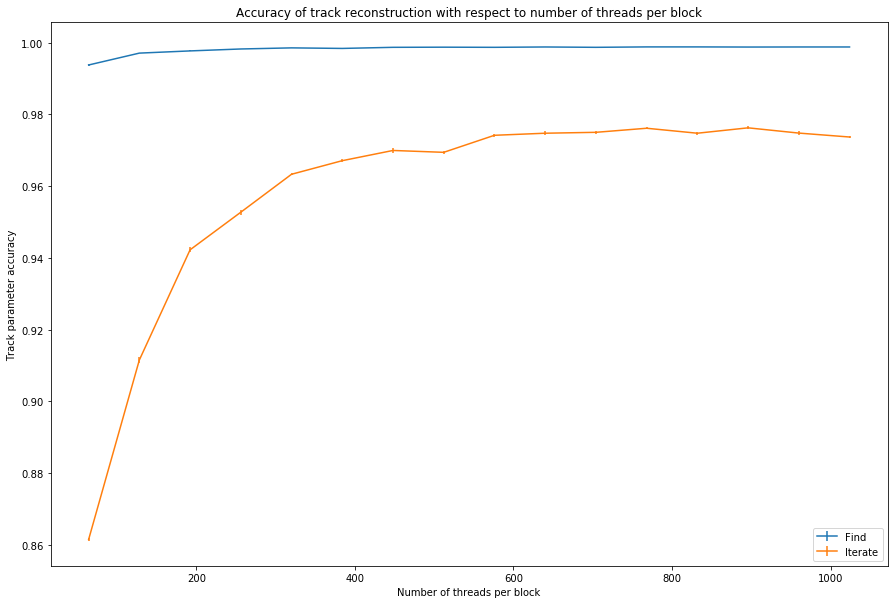

In [42]:
plt.rcParams["figure.figsize"] = (15,10)
plt.errorbar(thread_nos, hk_find_track_acc_means, yerr=hk_find_track_acc_err, label="Find")
plt.errorbar(thread_nos, hk_iterate_track_acc_means, yerr=hk_iterate_track_acc_err, label="Iterate")
plt.title("Accuracy of track reconstruction with respect to number of threads per block")
plt.ylabel("Track parameter accuracy")
plt.xlabel("Number of threads per block")
plt.legend()
plt.savefig("track_parameter_acc.pdf")
plt.show()

In [35]:
spccl_gpu_times = np.zeros(10)
spccl_cpu_times = np.zeros(10)

for i in range(10):
    path = "spccl/" + str(i+1) + ".txt"
    with open(path) as file:
        lines = file.readlines()

    spccl_gpu_times[i] = float(lines[3][36:-2])
    spccl_cpu_times[i] = float(lines[22][26:-1])

In [36]:
spccl_gpu_time_mean = np.mean(spccl_gpu_times)
spccl_gpu_time_err = np.std(spccl_gpu_times) / np.sqrt(10)

spccl_cpu_time_mean = np.mean(spccl_cpu_times)
spccl_cpu_time_err = np.std(spccl_cpu_times) / np.sqrt(10)

In [41]:
print(f"Sparse CCL: CPU: {spccl_cpu_time_mean:.5f} +- {spccl_cpu_time_err:.5f}s;"+
      f" GPU: {spccl_gpu_time_mean:.5f} +- {spccl_gpu_time_err:.5f}s")
min_time_find_idx = np.argmax(hk_find_means*-1)
min_time_threads = thread_nos[min_time_find_idx]
min_time = hk_find_means[min_time_find_idx]
min_time_err = hk_find_err[min_time_find_idx]
print(f"Minimum time using Find algorithm with GPU: {min_time:.5f} +- {min_time_err:.5f}s. "+
      f"This is for {min_time_threads} threads per block.")

Sparse CCL: CPU: 0.01413 +- 0.00006s; GPU: 0.03746 +- 0.00005s
Minimum time using Find algorithm with GPU: 0.00542 +- 0.00009s. This is for 960 threads per block.
